In [2]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt
import cmath

In [3]:
def n_0(a):
    return 2*integrate.quad(lambda x: np.exp(-x**2)/((np.exp(-x**2)+np.exp(-a))), 0, np.inf)[0]
n_0 = np.vectorize(n_0)
def n_2(a):
    return 2*integrate.quad(lambda x: np.exp(-x**2)*x**2/((np.exp(-x**2)+np.exp(-a))), 0, np.inf)[0]
n_2 = np.vectorize(n_2)
def Cauchy(z,a):
    eps=1e-10
    s=integrate.quad(lambda x: np.exp(-x**2)/((x-z)*(np.exp(-x**2)+np.exp(-a))), -np.inf, z.real-eps)[0]
    s=s+integrate.quad(lambda x: np.exp(-x**2)/((x-z)*(np.exp(-x**2)+np.exp(-a))), z.real+eps,  np.inf)[0]
    return s/n_0(a)
I = np.vectorize(Cauchy)

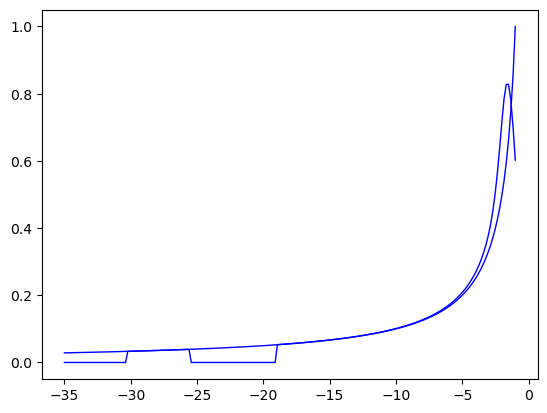

In [19]:
x=np.linspace(-35,-1, 200)
y=I(x,2)
plt.plot(x,y,color='blue',lw=1)
plt.plot(x,-1/x,color='blue',lw=1)
plt.show()

lambda_inf= -98.25560786313517


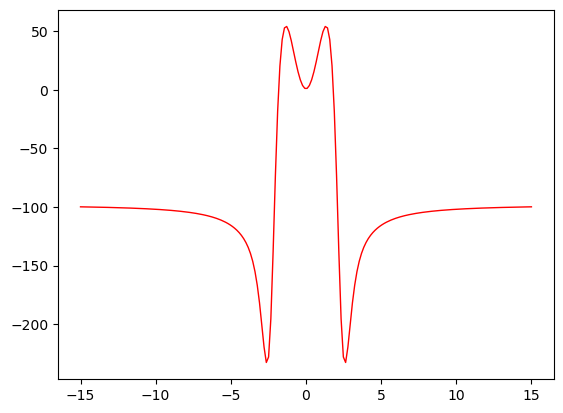

In [16]:
def lambda_x(w, v, a):
    B=n_0(a)/(n_2(a)*v**2)
    A=1-1j*w/v
    print('lambda_inf=',(1-1/A+1/(A*v)**2).real)
    z=np.linspace(-15,15, 200)
    y=((1-(B*z**2)/A**2-z*B*(z**2-A/B)*I(z,a)/A**2)).real
    plt.plot(z,y,color='red',lw=1)
    plt.show()
lambda_x(0.1, 0.005, 5)

C:\Users\tanya\AppData\Local\Temp\ipykernel_9392\1703911697.py:3: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]
C:\Users\tanya\AppData\Local\Temp\ipykernel_9392\1703911697.py:3: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]


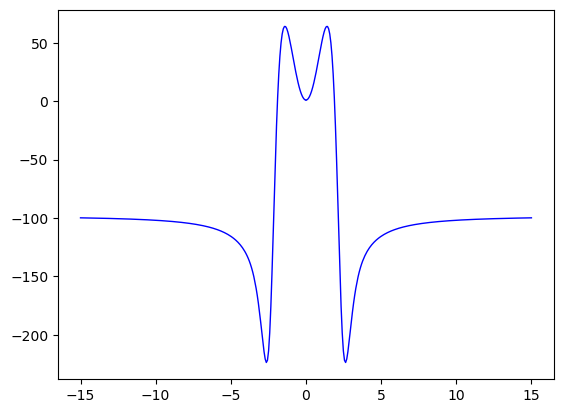

In [17]:
def Cauchy1(z,a):
    s=integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]
    s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]
    return s/n_0(a)
I1 = np.vectorize(Cauchy1)
def lambda_z_plus(w, v, a):
    B=n_0(a)/(n_2(a)*v**2)
    A=1-1j*w/v
    z=np.linspace(0,15, 200)+0.0001j
    y=(1-(B*z**2)/A**2-z*B*(z**2-A/B)*I1(z,a)/A**2).real
    plt.plot(z.real,y,color='blue',lw=1)
    z=np.linspace(-15,0, 200)-0.0001j
    y=(1-(B*z**2)/A**2-z*B*(z**2-A/B)*I1(z,a)/A**2).real
    plt.plot(z.real,y,color='blue',lw=1)
    plt.show()
lambda_z_plus(0.1, 0.005, 5)

C:\Users\tanya\AppData\Local\Temp\ipykernel_9392\129276461.py:3: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]
C:\Users\tanya\AppData\Local\Temp\ipykernel_9392\129276461.py:3: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]


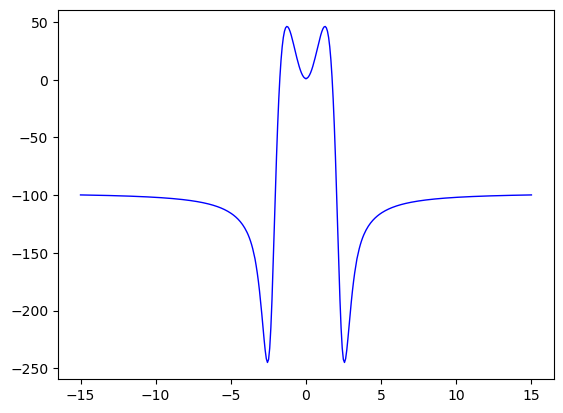

In [18]:
def Cauchy1(z, a):
    s=integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]
    s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]
    return s/n_0(a)
I1 = np.vectorize(Cauchy1)
def lambda_z_minus(w, v, a):
    B=n_0(a)/(n_2(a)*v**2)
    A=1-1j*w/v
    z=np.linspace(0,15, 200)-0.0001j
    y=(1-(B*z**2)/A**2-z*B*(z**2-A/B)*I1(z, a)/A**2).real
    plt.plot(z.real,y,color='blue',lw=1)
    z=np.linspace(-15,0, 200)+0.0001j
    y=(1-(B*z**2)/A**2-z*B*(z**2-A/B)*I1(z, a)/A**2).real
    plt.plot(z.real,y,color='blue',lw=1)
    plt.show()
lambda_z_minus(0.1, 0.005, 5)

C:\Users\tanya\AppData\Local\Temp\ipykernel_9392\3503418383.py:3: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]
C:\Users\tanya\AppData\Local\Temp\ipykernel_9392\3503418383.py:3: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]


lambda_inf= -98.25560786313517


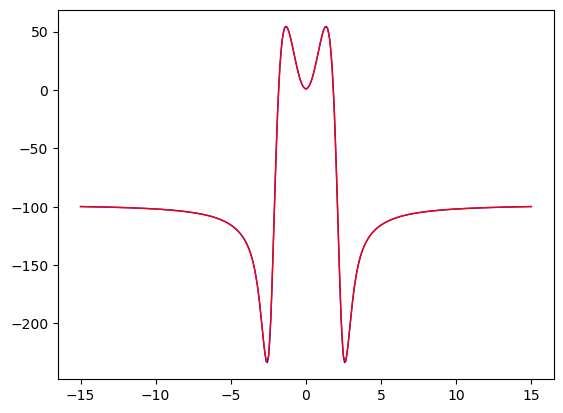

In [19]:
def Cauchy1(z,a):
    s=integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]
    s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]
    return s/n_0(a)
I1 = np.vectorize(Cauchy1)
def lambda_z_plus(w, v, a):
    B=n_0(a)/(n_2(a)*v**2)
    A=1-1j*w/v
    z=np.linspace(0,15, 200)-0.0001j
    y=(1-(B*z**2)/A**2-z*B*(z**2-A/B)*I1(z,a)/A**2).real+(1-(B*(z+0.0002j)**2)/A**2-(z+0.0002j)*B*((z+0.0002j)**2-A/B)*I1(z+0.0002j,a)/A**2).real
    plt.plot(z.real,y/2,color='blue',lw=1)
    z=np.linspace(-15,0, 200)+0.0001j
    y=(1-(B*z**2)/A**2-z*B*(z**2-A/B)*I1(z,a)/A**2).real+(1-(B*(z-0.0002j)**2)/A**2-(z-0.0002j)*B*((z-0.0002j)**2-A/B)*I1(z-0.0002j,a)/A**2).real
    plt.plot(z.real,y/2,color='blue',lw=1)
    lambda_x(0.1, 0.005, 5)
    plt.show()
lambda_z_plus(0.1, 0.005, 5)

In [20]:
def Cauchy2(z,a):
    s=integrate.quad(lambda x: (x**2+z.real**2-z.imag**2-2*x*z.real)*np.exp(-x**2)/((np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)**2), -np.inf, np.inf)[0]
    s=s+2j*z.imag*integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)**2), -np.inf, np.inf)[0]
    return s/n_0(a)
J=np.vectorize(Cauchy2)
def Cauchy1(z,a):
    s=integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]
    s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]
    return s/n_0(a)
I1 = np.vectorize(Cauchy1)
def lambda_z(w, v, z, a):
    B=n_0(a)/(n_2(a)*v**2)
    A=1-1j*w/v
    return (1-(B*z**2)/A**2-z*B*(z**2-A/B)*I(z, a)/A**2)
def dlambda_dz(w, v, z, a):
    B=n_0(a)/(n_2(a)*v**2)
    A=1-1j*w/v
    return -2*B*z/A**2-B*(3*z**2-A/B)*I(z, a)/A**2-B*z*(z**2-A/B)*J(z, a)/A**2

In [25]:
def root(w, v, a, x1):
   eps=1e-15
   x2=0
   while abs(x1-x2)>eps:
      s=x1-lambda_z(w, v, x1, a)/dlambda_dz(w, v, x1, a)
      x2=x1
      x1=s
   return x1
root=np.vectorize(root)
print(root(0.5, 0.001, 1, 0.00150365-0.64142307j))
lambda_z(0.5, 0.001, root(0.5, 0.001, 1, 0.00150365-0.64142307j) , 1)

(0.0008284279010870737-0.43791154353003386j)


(-2.975129111847845e-17-1.0028870095490916e-18j)

In [31]:
v=0.01
a=2
root(0.001 ,v, a, 0.0028-1.27j)

c:\Users\tanya\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:577: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func,bound,infbounds,args,full_output,epsabs,epsrel,limit)


array(0.00981932-0.00098196j)

c:\Users\tanya\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:577: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func,bound,infbounds,args,full_output,epsabs,epsrel,limit)
C:\Users\tanya\AppData\Local\Temp\ipykernel_3992\1464718975.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  s=s+2j*z.imag*integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)**2), -np.inf, np.inf)[0]
C:\Users\tanya\AppData\Local\Temp\ipykernel_3992\1464718975.py:2: IntegrationWarning: The al

[0.00981933+3.05067303e-30j 0.00981706-2.86404791e-02j
 0.00981037-5.72809336e-02j 0.00979949-8.59213594e-02j
 0.00978463-1.14561753e-01j 0.00976602-1.43202112e-01j
 0.00974392-1.71842434e-01j 0.00971858-2.00482717e-01j
 0.00969025-2.29122961e-01j 0.00965918-2.57763164e-01j
 0.00962564-2.86403326e-01j 0.00958987-3.15043449e-01j
 0.00955211-3.43683531e-01j 0.00951259-3.72323575e-01j
 0.00947153-4.00963582e-01j 0.00942916-4.29603552e-01j
 0.00938566-4.58243488e-01j 0.00934124-4.86883391e-01j
 0.00929606-5.15523263e-01j 0.0092503 -5.44163106e-01j
 0.0092041 -5.72802921e-01j 0.00915762-6.01442711e-01j
 0.00911097-6.30082478e-01j 0.00906428-6.58722222e-01j
 0.00901766-6.87361947e-01j]


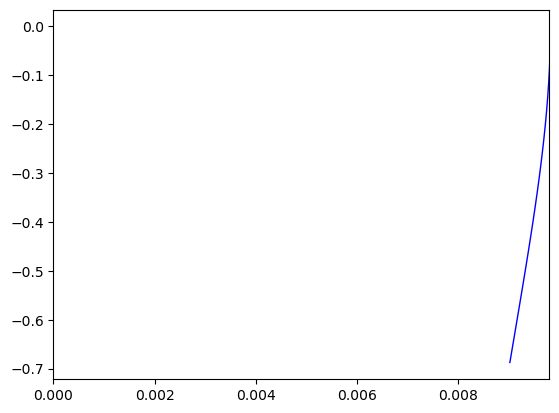

In [23]:
v=0.01
a=2
x1=0.0028-1.27j
w=np.linspace(0, 0.7, 25)
z=root(w,v, a, x1)
print(z)
plt.plot(z.real,z.imag,color='blue',lw=1)
plt.xlim(0,0.0098)
plt.show()